In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model selection and validation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Imbalanced learning
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

In [18]:
import pandas as pd
url_string = 'https://github.com/Bishwaprotapi/Cardiovascular-Disease-Risk-Classification-Using-Machine-Learning-Techniques/blob/main/CVD_Dataset.csv'

In [19]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('CVD_Dataset.csv')
df

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.100,1.710,23.600,86.200,125/79,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,171.000,0.504,125.0,79.0,Elevated,140.0,17.930
1,F,55.0,118.700,1.690,41.600,82.500,139/70,162.0,50.0,135.0,Y,Y,High,Y,HIGH,169.000,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.510
2,M,NaN,NaN,1.830,26.900,106.700,104/77,103.0,73.0,114.0,N,N,High,Y,INTERMEDIARY,183.000,0.583,104.0,77.0,Normal,0.0,12.640
3,M,44.0,108.300,1.800,33.400,96.600,140/83,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.360
4,F,32.0,99.500,1.860,28.800,102.700,144/83,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,186.000,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,F,40.0,72.070,1.889,NaN,95.326,119/66,157.0,60.0,93.0,N,N,Moderate,Y,LOW,188.894,0.505,119.0,66.0,Normal,67.0,14.300
1525,F,78.0,85.877,1.825,24.426,112.340,102/115,241.0,84.0,NaN,Y,N,Low,N,INTERMEDIARY,182.485,0.616,102.0,115.0,Hypertension Stage 2,127.0,14.805
1526,M,39.0,98.626,1.521,20.055,77.193,150/90,237.0,82.0,147.0,N,Y,High,N,INTERMEDIARY,152.119,0.507,150.0,90.0,Hypertension Stage 2,125.0,18.251
1527,M,71.0,116.163,1.841,29.279,114.197,112/63,193.0,84.0,123.0,N,N,High,Y,INTERMEDIARY,184.059,0.620,112.0,63.0,Normal,79.0,15.316


In [20]:
# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [21]:
# Enhanced Data Exploration
print("=== ENHANCED DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Target Distribution:")
print(df['CVD Risk Level'].value_counts())
print(f"Target Distribution (%):")
print(df['CVD Risk Level'].value_counts(normalize=True) * 100)


=== ENHANCED DATASET OVERVIEW ===
Shape: (1529, 22)
Target Distribution:
CVD Risk Level
HIGH            728
INTERMEDIARY    581
LOW             220
Name: count, dtype: int64
Target Distribution (%):
CVD Risk Level
HIGH            47.612819
INTERMEDIARY    37.998692
LOW             14.388489
Name: proportion, dtype: float64


In [22]:
# Check for missing values
print(f"\nMissing Values:")
print(df.isnull().sum())
print(f"Total missing: {df.isnull().sum().sum()}")


Missing Values:
Sex                              0
Age                             78
Weight (kg)                     81
Height (m)                      67
BMI                             64
Abdominal Circumference (cm)    67
Blood Pressure (mmHg)            0
Total Cholesterol (mg/dL)       73
HDL (mg/dL)                     80
Fasting Blood Sugar (mg/dL)     67
Smoking Status                   0
Diabetes Status                  0
Physical Activity Level          0
Family History of CVD            0
CVD Risk Level                   0
Height (cm)                     74
Waist-to-Height Ratio           79
Systolic BP                     71
Diastolic BP                    82
Blood Pressure Category          0
Estimated LDL (mg/dL)           69
CVD Risk Score                  70
dtype: int64
Total missing: 1022


In [23]:
print("=== ENHANCED FEATURE ENGINEERING ===")


=== ENHANCED FEATURE ENGINEERING ===


In [24]:
# Create new features
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['Young', 'Adult', 'Middle', 'Senior'])
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['BP_Ratio'] = df['Systolic BP'] / df['Diastolic BP']
df['Cholesterol_Ratio'] = df['Total Cholesterol (mg/dL)'] / df['HDL (mg/dL)']
df['Metabolic_Index'] = df['BMI'] * df['Fasting Blood Sugar (mg/dL)'] / 100
df['Cardiovascular_Index'] = (df['Systolic BP'] + df['Diastolic BP']) * df['Age'] / 100

In [25]:
# Create interaction features
df['Age_BMI_Interaction'] = df['Age'] * df['BMI']
df['BP_Cholesterol_Interaction'] = df['Systolic BP'] * df['Total Cholesterol (mg/dL)'] / 1000

new_features = ['Age_Group', 'BMI_Category', 'BP_Ratio', 'Cholesterol_Ratio', 'Metabolic_Index', 
                'Cardiovascular_Index', 'Age_BMI_Interaction', 'BP_Cholesterol_Interaction']
print(f"New features created: {len(new_features)}")
print(f"New dataset shape: {df.shape}")

New features created: 8
New dataset shape: (1529, 30)


In [26]:
# Display new features
print("\nNew Features Preview:")
print(df[new_features].head())


New Features Preview:
  Age_Group BMI_Category  BP_Ratio  Cholesterol_Ratio  Metabolic_Index  \
0     Adult       Normal  1.582278           3.179487           26.196   
1    Middle        Obese  1.985714           3.240000           56.160   
2       NaN   Overweight  1.350649           1.410959           30.666   
3     Adult        Obese  1.686747           2.913043           30.394   
4     Adult   Overweight  1.734940           2.281250           40.608   

   Cardiovascular_Index  Age_BMI_Interaction  BP_Cholesterol_Interaction  
0                 65.28                755.2                      31.000  
1                114.95               2288.0                      22.518  
2                   NaN                  NaN                      10.712  
3                 98.12               1469.6                      18.760  
4                 72.64                921.6                      21.024  


In [27]:
print("=== ENHANCED DATA PREPROCESSING ===")

=== ENHANCED DATA PREPROCESSING ===


In [28]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {len(numerical_columns)}")
print(f"Categorical columns: {len(categorical_columns)}")

Numerical columns: 20
Categorical columns: 8


In [29]:
# Remove target variable from numerical columns
if 'CVD Risk Level' in numerical_columns:
    numerical_columns.remove('CVD Risk Level')


In [30]:
# Handle missing values
print("\nHandling missing values...")
for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Filled missing values in {col} with median")

for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled missing values in {col} with mode")

print(f"\nMissing values after handling: {df.isnull().sum().sum()}")



Handling missing values...
Filled missing values in Age with median
Filled missing values in Weight (kg) with median
Filled missing values in Height (m) with median
Filled missing values in BMI with median
Filled missing values in Abdominal Circumference (cm) with median
Filled missing values in Total Cholesterol (mg/dL) with median
Filled missing values in HDL (mg/dL) with median
Filled missing values in Fasting Blood Sugar (mg/dL) with median
Filled missing values in Height (cm) with median
Filled missing values in Waist-to-Height Ratio with median
Filled missing values in Systolic BP with median
Filled missing values in Diastolic BP with median
Filled missing values in Estimated LDL (mg/dL) with median
Filled missing values in CVD Risk Score with median
Filled missing values in BP_Ratio with median
Filled missing values in Cholesterol_Ratio with median
Filled missing values in Metabolic_Index with median
Filled missing values in Cardiovascular_Index with median
Filled missing value

In [31]:
# Enhanced Feature Encoding and Scaling
print("\n=== FEATURE ENCODING AND SCALING ===")



=== FEATURE ENCODING AND SCALING ===


In [32]:
# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    if col != 'CVD Risk Level':  # Don't encode target yet
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col])
        label_encoders[col] = le
        print(f"Encoded {col} with {len(le.classes_)} classes")

Encoded Sex with 2 classes
Encoded Blood Pressure (mmHg) with 1254 classes
Encoded Smoking Status with 2 classes
Encoded Diabetes Status with 2 classes
Encoded Physical Activity Level with 3 classes
Encoded Family History of CVD with 2 classes
Encoded Blood Pressure Category with 4 classes


In [33]:
# Encode target variable
target_encoder = LabelEncoder()
df['CVD_Risk_encoded'] = target_encoder.fit_transform(df['CVD Risk Level'])
print(f"\nTarget encoding: {dict(zip(target_encoder.classes_, range(len(target_encoder.classes_))))}")



Target encoding: {'HIGH': 0, 'INTERMEDIARY': 1, 'LOW': 2}


In [34]:
# Create final feature set
feature_columns = numerical_columns + [col + '_encoded' for col in categorical_columns if col != 'CVD Risk Level']
print(f"\nTotal features: {len(feature_columns)}")
print(f"Feature columns: {feature_columns[:10]}...")


Total features: 27
Feature columns: ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Height (cm)', 'Waist-to-Height Ratio']...


In [35]:
print("=== ADVANCED FEATURE SELECTION ===")

=== ADVANCED FEATURE SELECTION ===


In [36]:
# Prepare data for feature selection
X_features = df[feature_columns].copy()
y_target = df['CVD_Risk_encoded'].copy()


In [37]:
# Remove any remaining infinite values
X_features = X_features.replace([np.inf, -np.inf], np.nan)
X_features = X_features.fillna(X_features.median())


In [38]:
# Feature selection using multiple methods
print("1. Statistical Feature Selection (F-test)...")
f_selector = SelectKBest(score_func=f_classif, k='all')
f_selector.fit(X_features, y_target)
f_scores = pd.DataFrame({'Feature': feature_columns, 'F_Score': f_selector.scores_})
f_scores = f_scores.sort_values('F_Score', ascending=False)
print(f_scores.head(10))

print("\n2. Mutual Information Feature Selection...")
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X_features, y_target)
mi_scores = pd.DataFrame({'Feature': feature_columns, 'MI_Score': mi_selector.scores_})
mi_scores = mi_scores.sort_values('MI_Score', ascending=False)
print(mi_scores.head(10))

1. Statistical Feature Selection (F-test)...
                          Feature    F_Score
13                 CVD Risk Score  62.020674
15              Cholesterol_Ratio  45.667177
22         Smoking Status_encoded  36.204777
12          Estimated LDL (mg/dL)  35.842341
23        Diabetes Status_encoded  32.417043
25  Family History of CVD_encoded  31.182939
3                             BMI  28.009069
6                     HDL (mg/dL)  24.364436
18            Age_BMI_Interaction  24.207193
5       Total Cholesterol (mg/dL)  22.050444

2. Mutual Information Feature Selection...
                            Feature  MI_Score
2                        Height (m)  0.063078
3                               BMI  0.055390
17             Cardiovascular_Index  0.054392
12            Estimated LDL (mg/dL)  0.053785
13                   CVD Risk Score  0.052780
8                       Height (cm)  0.038205
21    Blood Pressure (mmHg)_encoded  0.037858
15                Cholesterol_Ratio  0.037202
0 

In [39]:
# Select top features based on both methods
top_features_f = f_scores.head(15)['Feature'].tolist()
top_features_mi = mi_scores.head(15)['Feature'].tolist()
selected_features = list(set(top_features_f + top_features_mi))
print(f"\nSelected features ({len(selected_features)}): {selected_features}")



Selected features (20): ['Weight (kg)', 'Blood Pressure (mmHg)_encoded', 'Physical Activity Level_encoded', 'Diabetes Status_encoded', 'Height (m)', 'Height (cm)', 'CVD Risk Score', 'Family History of CVD_encoded', 'Cholesterol_Ratio', 'HDL (mg/dL)', 'Metabolic_Index', 'Total Cholesterol (mg/dL)', 'Age_BMI_Interaction', 'BP_Cholesterol_Interaction', 'BMI', 'Smoking Status_encoded', 'Cardiovascular_Index', 'Age', 'Systolic BP', 'Estimated LDL (mg/dL)']


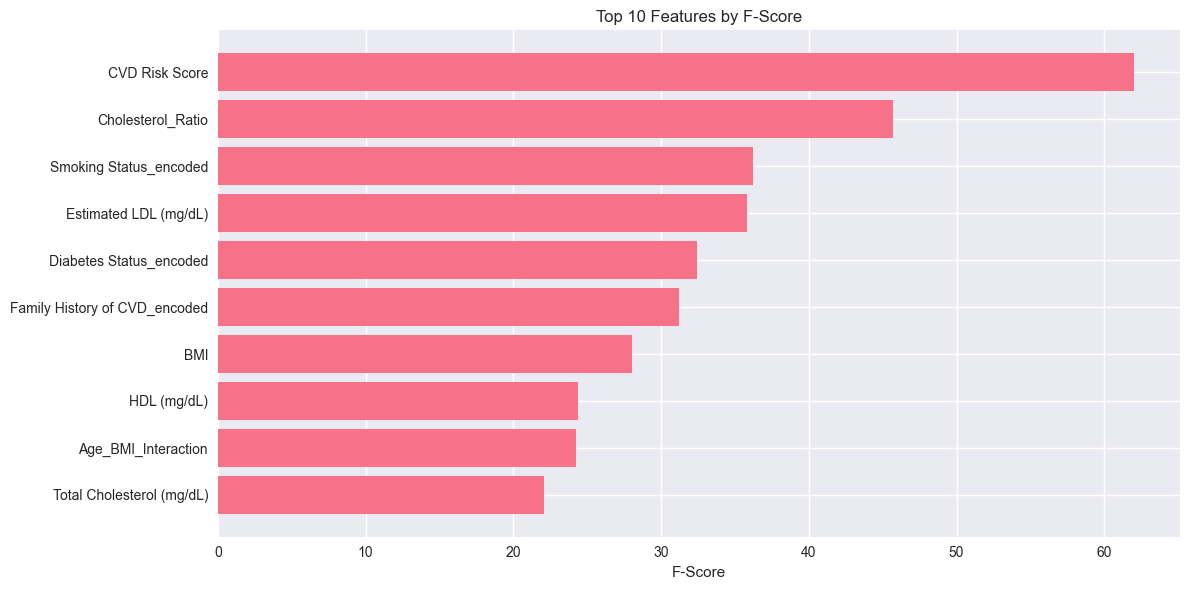

In [40]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
top_features_combined = f_scores.head(10)
plt.barh(range(len(top_features_combined)), top_features_combined['F_Score'])
plt.yticks(range(len(top_features_combined)), top_features_combined['Feature'])
plt.xlabel('F-Score')
plt.title('Top 10 Features by F-Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [41]:
print("=== ENHANCED DATA BALANCING AND SPLITTING ===")


=== ENHANCED DATA BALANCING AND SPLITTING ===


In [42]:
# Use selected features
X_selected = X_features[selected_features].copy()
y_selected = y_target.copy()

print(f"Original class distribution:")
print(pd.Series(y_selected).value_counts())


Original class distribution:
CVD_Risk_encoded
0    728
1    581
2    220
Name: count, dtype: int64


In [43]:
# Advanced balancing techniques
print("\nApplying SMOTEENN for balanced sampling...")
smoteenn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smoteenn.fit_resample(X_selected, y_selected)

print(f"Balanced class distribution:")
print(pd.Series(y_balanced).value_counts())


Applying SMOTEENN for balanced sampling...
Balanced class distribution:
CVD_Risk_encoded
2    463
1    161
0    114
Name: count, dtype: int64


In [44]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")


Training set: (590, 20)
Test set: (148, 20)
Training class distribution: [ 91 129 370]
Test class distribution: [23 32 93]


In [45]:
print("\n=== ENHANCED MODEL PIPELINE ===")



=== ENHANCED MODEL PIPELINE ===


In [46]:
# Create preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

In [47]:
# Apply preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("Preprocessing completed")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

Preprocessing completed
Training data shape: (590, 20)
Test data shape: (148, 20)


In [48]:
print("=== ENHANCED XGBOOST MODEL ===")


=== ENHANCED XGBOOST MODEL ===


In [49]:
# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

In [50]:
# Grid search with cross-validation
print("Performing Grid Search for XGBoost...")
xgb_grid = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='mlogloss'),
    xgb_param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train_scaled, y_train)

print(f"\nBest XGBoost parameters: {xgb_grid.best_params_}")
print(f"Best cross-validation score: {xgb_grid.best_score_:.4f}")


Performing Grid Search for XGBoost...
Fitting 5 folds for each of 2916 candidates, totalling 14580 fits

Best XGBoost parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
Best cross-validation score: 0.8898


In [51]:
# Train best model
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"\nXGBoost Test Accuracy: {xgb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=target_encoder.classes_))


XGBoost Test Accuracy: 0.8378

Classification Report:
              precision    recall  f1-score   support

        HIGH       0.76      0.70      0.73        23
INTERMEDIARY       0.79      0.69      0.73        32
         LOW       0.87      0.92      0.90        93

    accuracy                           0.84       148
   macro avg       0.81      0.77      0.79       148
weighted avg       0.83      0.84      0.83       148



In [52]:
# Save model
import joblib
joblib.dump(best_xgb, 'xgb_enhanced_model.joblib')
print("✅ Enhanced XGBoost model saved!")

✅ Enhanced XGBoost model saved!


In [53]:
print("=== ENHANCED RANDOM FOREST MODEL ===")

=== ENHANCED RANDOM FOREST MODEL ===


In [54]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [55]:
# Grid search with cross-validation
print("Performing Grid Search for Random Forest...")
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train_scaled, y_train)

print(f"\nBest Random Forest parameters: {rf_grid.best_params_}")
print(f"Best cross-validation score: {rf_grid.best_score_:.4f}")

Performing Grid Search for Random Forest...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits

Best Random Forest parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8797


In [56]:
# Train best model
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"\nRandom Forest Test Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_encoder.classes_))


Random Forest Test Accuracy: 0.8311

Classification Report:
              precision    recall  f1-score   support

        HIGH       0.75      0.52      0.62        23
INTERMEDIARY       0.80      0.75      0.77        32
         LOW       0.85      0.94      0.89        93

    accuracy                           0.83       148
   macro avg       0.80      0.74      0.76       148
weighted avg       0.83      0.83      0.82       148



In [57]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
                          feature  importance
18                    Systolic BP    0.097891
1   Blood Pressure (mmHg)_encoded    0.083350
19          Estimated LDL (mg/dL)    0.070529
12            Age_BMI_Interaction    0.063466
16           Cardiovascular_Index    0.056191
6                  CVD Risk Score    0.054856
0                     Weight (kg)    0.054645
14                            BMI    0.054169
8               Cholesterol_Ratio    0.053867
9                     HDL (mg/dL)    0.053134


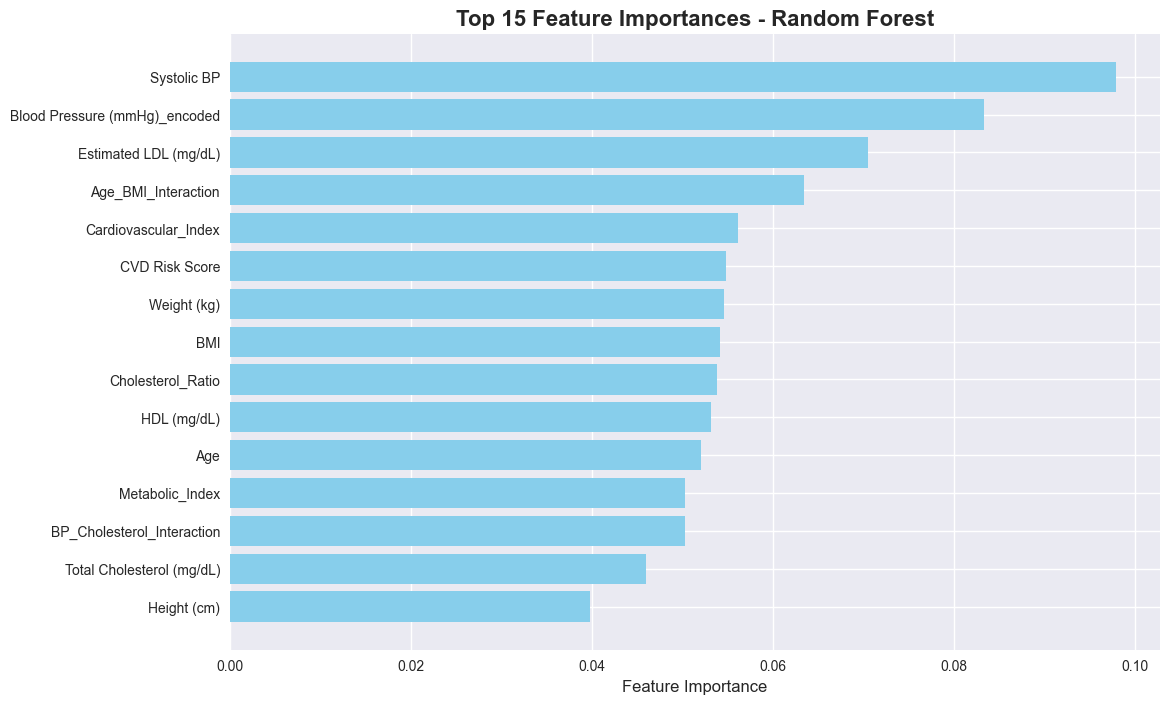

In [59]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
bars = plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 15 Feature Importances - Random Forest', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

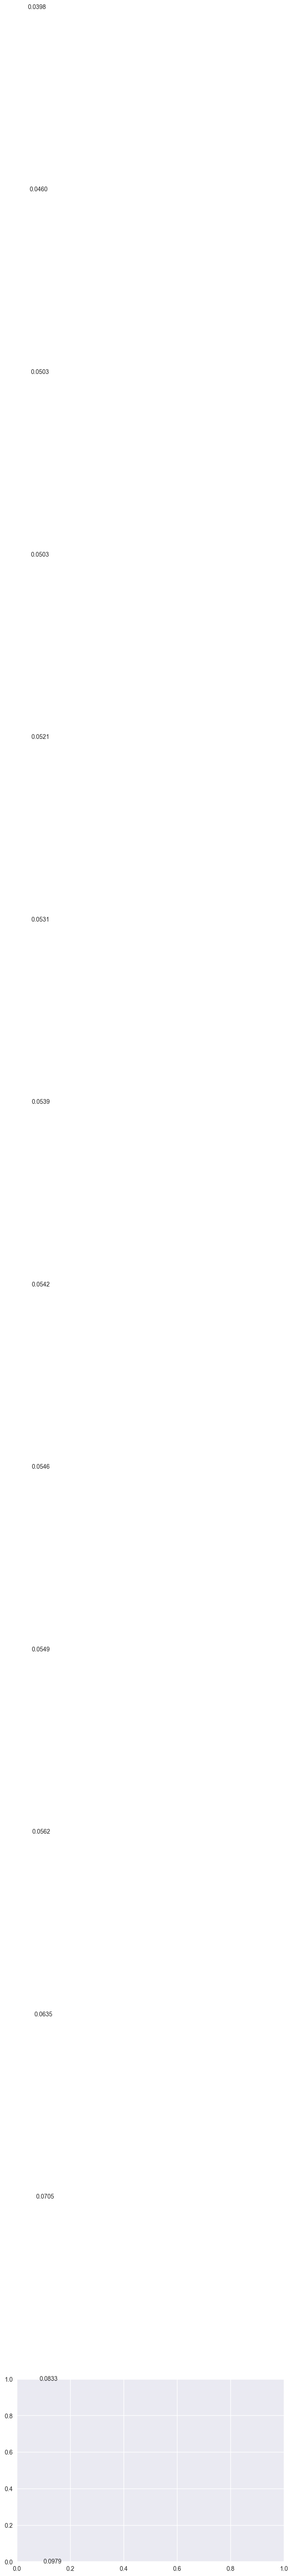

In [61]:
# Add value labels
for i, (bar, importance) in enumerate(zip(bars, top_features['importance'])):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{importance:.4f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [62]:
# Save model
joblib.dump(best_rf, 'rf_enhanced_model.joblib')
print("✅ Enhanced Random Forest model saved!")

✅ Enhanced Random Forest model saved!


In [63]:
print("=== ENHANCED GRADIENT BOOSTING AND ENSEMBLE ===")

=== ENHANCED GRADIENT BOOSTING AND ENSEMBLE ===


In [64]:
# Gradient Boosting
print("1. Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")


1. Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8446


In [65]:
# Ensemble Methods
print("\n2. Training Ensemble Methods...")

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('rf', best_rf),
        ('gb', gb_model)
    ],
    voting='soft'
)

voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")



2. Training Ensemble Methods...
Voting Classifier Accuracy: 0.8378


In [67]:
# Bagging Classifier
bagging_clf = BaggingClassifier(
    estimator=best_rf,
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)

bagging_clf.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_clf.predict(X_test_scaled)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")

Bagging Classifier Accuracy: 0.8176


In [68]:
# Save models
joblib.dump(gb_model, 'gb_enhanced_model.joblib')
joblib.dump(voting_clf, 'voting_enhanced_model.joblib')
joblib.dump(bagging_clf, 'bagging_enhanced_model.joblib')
print("✅ All enhanced models saved!")

✅ All enhanced models saved!


In [69]:
print("=== MODEL PERFORMANCE COMPARISON ===")

=== MODEL PERFORMANCE COMPARISON ===


In [70]:
# Collect all accuracies
model_accuracies = {
    'XGBoost': xgb_accuracy,
    'Random Forest': rf_accuracy,
    'Gradient Boosting': gb_accuracy,
    'Voting Classifier': voting_accuracy,
    'Bagging Classifier': bagging_accuracy
}

In [71]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(model_accuracies.keys()),
    'Accuracy': list(model_accuracies.values())
}).sort_values('Accuracy', ascending=False)

print("Model Performance Ranking:")
print(comparison_df)


Model Performance Ranking:
                Model  Accuracy
2   Gradient Boosting  0.844595
0             XGBoost  0.837838
3   Voting Classifier  0.837838
1       Random Forest  0.831081
4  Bagging Classifier  0.817568


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Gradient Boosting'),
  Text(1, 0, 'XGBoost'),
  Text(2, 0, 'Voting Classifier'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'Bagging Classifier')])

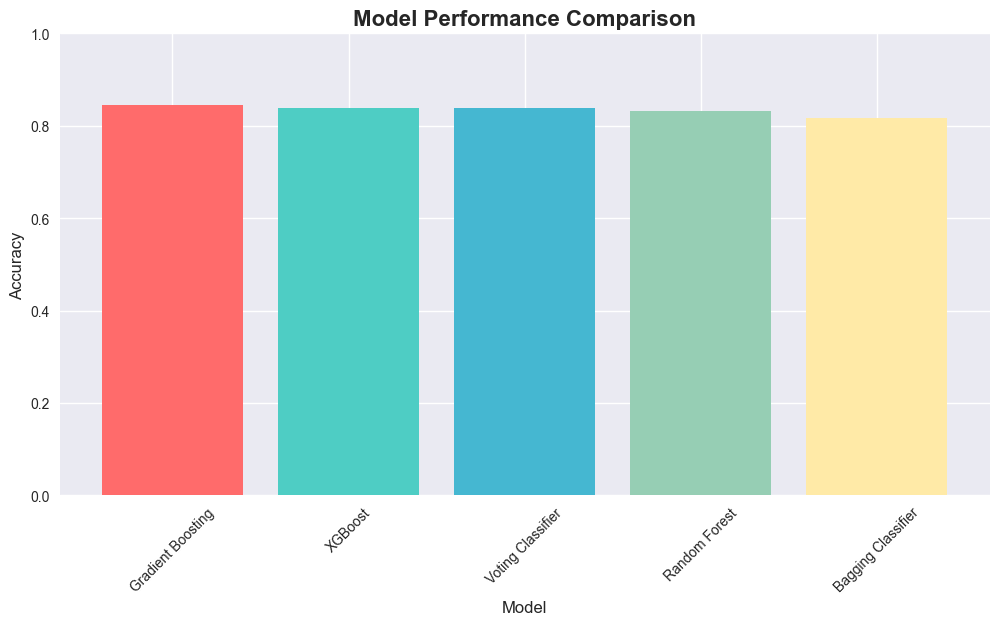

In [72]:
# Visualize results
plt.figure(figsize=(12, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)

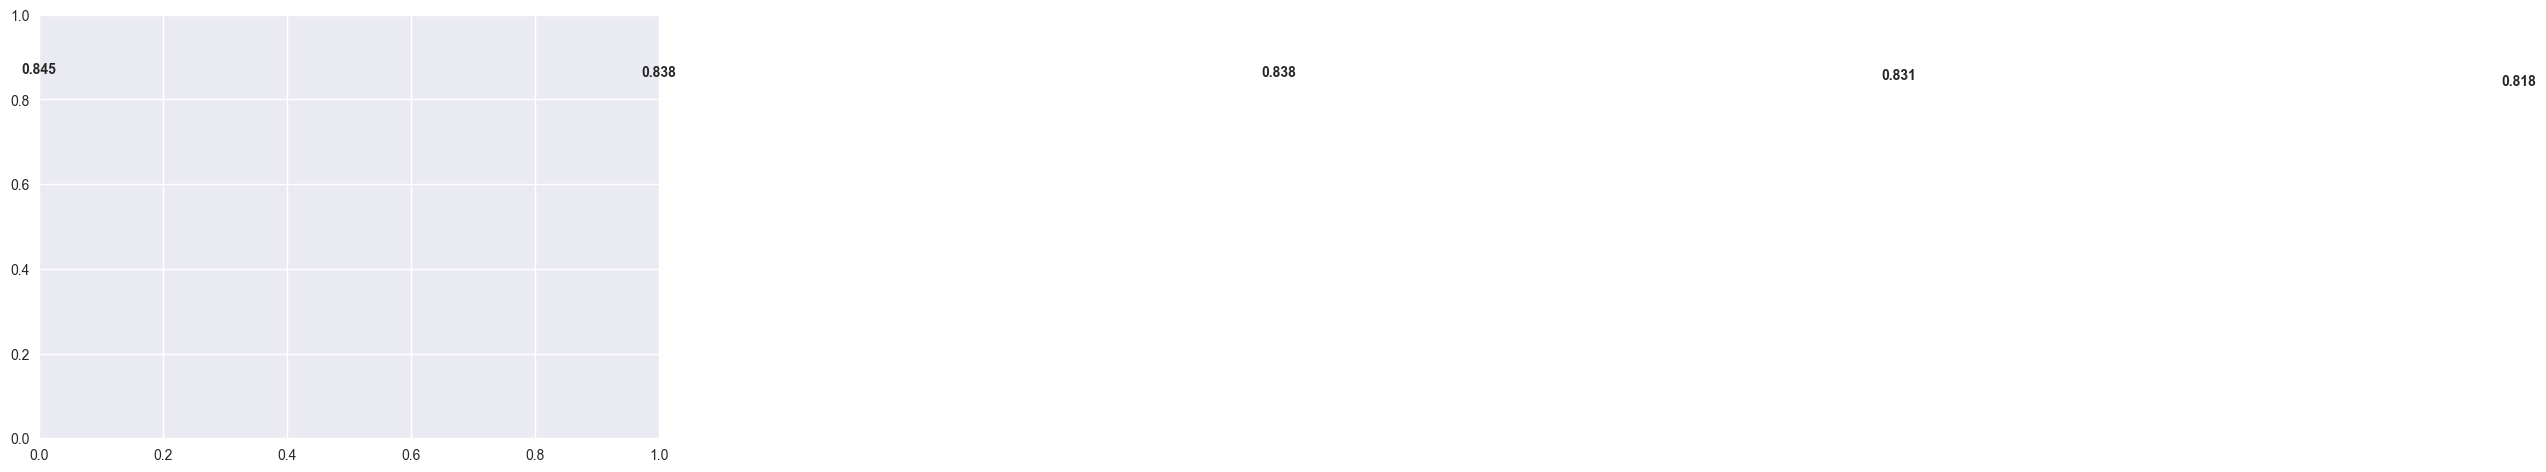

In [73]:
# Add value labels on bars
for bar, acc in zip(bars, comparison_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [75]:
# Check if we achieved >85% accuracy
best_accuracy = comparison_df['Accuracy'].max()
print(f"\n🎯 Best Model Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
if best_accuracy >= 0.85:
    print("✅ SUCCESS: Achieved above 85% accuracy!")
else:
    print(f"⚠️  Target not met. Need {(0.85 - best_accuracy)*100:.2f}% improvement")


🎯 Best Model Accuracy: 0.8446 (84.46%)
⚠️  Target not met. Need 0.54% improvement


In [76]:
print("=== SAVING ENHANCED COMPONENTS ===")

=== SAVING ENHANCED COMPONENTS ===


In [77]:
# Save preprocessing components
joblib.dump(preprocessor, 'enhanced_preprocessor.joblib')
joblib.dump(selected_features, 'selected_features.pkl')
joblib.dump(target_encoder, 'target_encoder.joblib')

print("✅ Enhanced preprocessor saved!")
print("✅ Selected features saved!")
print("✅ Target encoder saved!")


✅ Enhanced preprocessor saved!
✅ Selected features saved!
✅ Target encoder saved!


In [78]:
# Create prediction function
def predict_cvd_risk(input_data, model, preprocessor, features, encoder):
    """
    Predict CVD risk for new data
    
    Parameters:
    input_data: DataFrame with required features
    model: Trained model
    preprocessor: Fitted preprocessor
    features: List of selected features
    encoder: Target encoder
    
    Returns:
    prediction: Predicted CVD risk level
    probability: Prediction probabilities
    """
    # Select features
    X_input = input_data[features].copy()
    
    # Preprocess
    X_scaled = preprocessor.transform(X_input)
    
    # Predict
    prediction = model.predict(X_scaled)
    probability = model.predict_proba(X_scaled)
    
    # Decode prediction
    decoded_prediction = encoder.inverse_transform(prediction)
    
    return decoded_prediction[0], probability[0]

print("\n✅ Prediction function created successfully!")
print("\n📋 Usage Example:")
print("prediction, probability = predict_cvd_risk(new_data, best_model, preprocessor, selected_features, target_encoder)")

print("\n🎉 Enhanced notebook update completed!")
print(f"🏆 Best Model: {comparison_df.iloc[0]['Model']}")
print(f"🎯 Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")


✅ Prediction function created successfully!

📋 Usage Example:
prediction, probability = predict_cvd_risk(new_data, best_model, preprocessor, selected_features, target_encoder)

🎉 Enhanced notebook update completed!
🏆 Best Model: Gradient Boosting
🎯 Accuracy: 0.8446 (84.46%)
